In [1]:
from fbprophet import Prophet
import pandas as pd

In [3]:
df = pd.read_csv('btc_twt_trend.csv')

In [4]:
df = pd.read_csv('btc_twt_trend.csv')
cols = df.columns.to_list()
cols[cols.index('date')] = 'ds'
cols[cols.index('btc_close')] ='y'
df.columns = cols

In [7]:
df.head()

,btc_time,btc_high,btc_low,btc_open,btc_volumefrom,btc_volumeto,y,btc_conversionType,ds,num_tweets,trend_bitcoin_unscaled,trend_bitcoin_monthly,trend_isPartial,trend_scale,trend_bitcoin
0,1397088000,463.45,384.63,457.34,3647.72,1547153.29,384.63,direct,2014-04-09,8193.0,93,4.0,NaN,0.04,3.72
1,1397174400,450.40,355.71,384.63,5162.96,2175242.95,435.14,direct,2014-04-10,15039.0,100,4.0,NaN,0.04,4.00
2,1397260800,469.83,428.02,435.14,5188.34,2293511.20,437.65,direct,2014-04-11,14907.0,97,4.0,NaN,0.04,3.88
3,1397347200,454.15,409.85,437.65,4972.43,2143146.77,427.60,direct,2014-04-12,7582.0,72,4.0,NaN,0.04,2.88
4,1397433600,497.83,420.08,427.60,7624.33,3546258.23,478.38,direct,2014-04-13,10674.0,66,4.0,NaN,0.04,2.64


In [8]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3184,2022-12-27
3185,2022-12-28
3186,2022-12-29
3187,2022-12-30
3188,2022-12-31


In [10]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3184,2022-12-27,94478.465931,86918.035717,101925.234732
3185,2022-12-28,94718.053235,87835.330360,102072.080916
3186,2022-12-29,95025.347304,87804.706940,103105.843336
3187,2022-12-30,95320.306649,87887.517741,102736.018862
3188,2022-12-31,95622.747065,87981.099574,103520.674048


In [11]:
df[['ds','y']]

,ds,y
0,2014-04-09,384.63
1,2014-04-10,435.14
2,2014-04-11,437.65
3,2014-04-12,427.60
4,2014-04-13,478.38
...,...,...
2819,2021-12-27,47536.39
2820,2021-12-28,46471.70
2821,2021-12-29,47129.66
2822,2021-12-30,46197.31


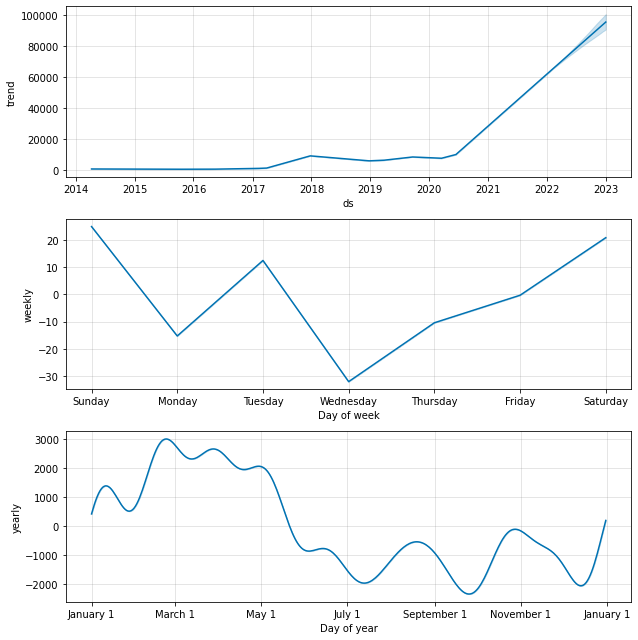

In [12]:
fig2 = m.plot_components(forecast)

In [15]:
df.shape

(2824, 15)

In [14]:
m = Prophet()
m.fit(df[:2093])

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
2824-2093

731

In [33]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-04-09,324.188558,-1793.784791,1131.961617,324.188558,324.188558,-625.365539,-625.365539,-625.365539,-13.083983,-13.083983,-13.083983,-612.281555,-612.281555,-612.281555,0.0,0.0,0.0,-301.176981
1,2014-04-10,324.132733,-1724.027612,1255.211258,324.132733,324.132733,-583.369800,-583.369800,-583.369800,1.372325,1.372325,1.372325,-584.742125,-584.742125,-584.742125,0.0,0.0,0.0,-259.237067
2,2014-04-11,324.076908,-1682.195697,1294.437446,324.076908,324.076908,-544.784082,-544.784082,-544.784082,13.280279,13.280279,13.280279,-558.064361,-558.064361,-558.064361,0.0,0.0,0.0,-220.707174
3,2014-04-12,324.021083,-1787.228887,1298.186292,324.021083,324.021083,-528.262884,-528.262884,-528.262884,4.019317,4.019317,4.019317,-532.282201,-532.282201,-532.282201,0.0,0.0,0.0,-204.241801
4,2014-04-13,323.965259,-1506.778518,1438.997359,323.965259,323.965259,-495.859294,-495.859294,-495.859294,11.522988,11.522988,11.522988,-507.382282,-507.382282,-507.382282,0.0,0.0,0.0,-171.894036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2819,2021-12-27,18074.868782,480.337925,35421.417613,700.393273,35427.298676,305.024120,305.024120,305.024120,-7.107912,-7.107912,-7.107912,312.132032,312.132032,312.132032,0.0,0.0,0.0,18379.892902
2820,2021-12-28,18086.533590,1121.878859,35620.460333,660.214662,35459.744474,297.239375,297.239375,297.239375,-10.003013,-10.003013,-10.003013,307.242388,307.242388,307.242388,0.0,0.0,0.0,18383.772964
2821,2021-12-29,18098.198397,1130.110346,35740.934404,620.036051,35492.190272,289.430240,289.430240,289.430240,-13.083983,-13.083983,-13.083983,302.514223,302.514223,302.514223,0.0,0.0,0.0,18387.628636
2822,2021-12-30,18109.863204,430.851978,36190.179741,579.857440,35541.480000,299.384990,299.384990,299.384990,1.372325,1.372325,1.372325,298.012665,298.012665,298.012665,0.0,0.0,0.0,18409.248193


In [19]:
future = m.make_future_dataframe(periods=731)
future.tail()
forecast = m.predict(future)

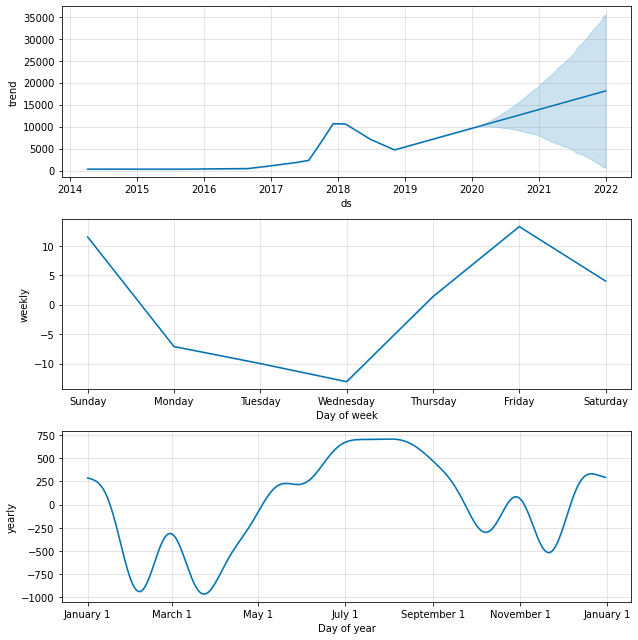

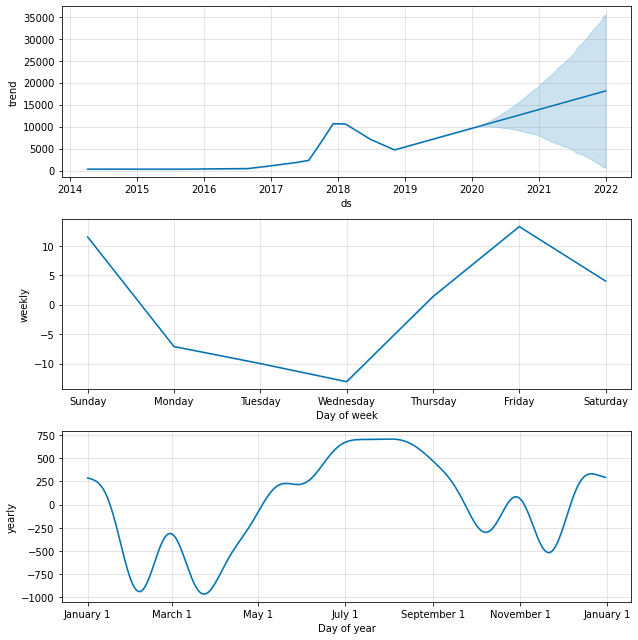

In [30]:
m.plot_components(forecast)

In [58]:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
import numpy as np


df = pd.read_csv('btc_twt_trend.csv')
cols = df.columns.to_list()
cols[cols.index('date')] = 'ds'
cols[cols.index('btc_close')] ='y'
df.columns = cols

m = Prophet(growth="linear")
m.fit(df)
forecast = m.predict(future)
df_cv = cross_validation(m, initial = '2093 days', period = '7 days', horizon = '365 days')
df_p = performance_metrics(df_cv)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 53 forecasts with cutoffs between 2020-01-02 00:00:00 and 2020-12-31 00:00:00


  0%|          | 0/53 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


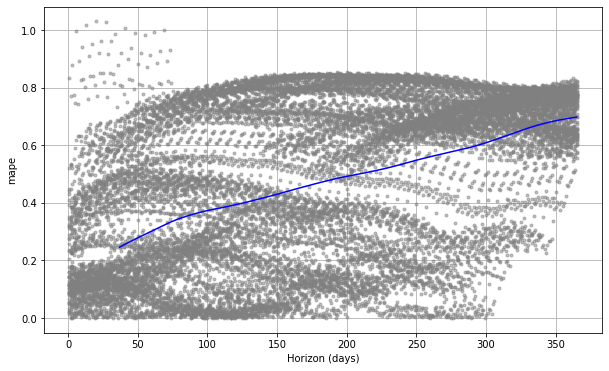

In [60]:
from fbprophet.plot import plot_cross_validation_metric

fig = plot_cross_validation_metric(df_cv, metric='mape')

INFO:fbprophet:Making 53 forecasts with cutoffs between 2020-01-02 00:00:00 and 2020-12-31 00:00:00


  0%|          | 0/53 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


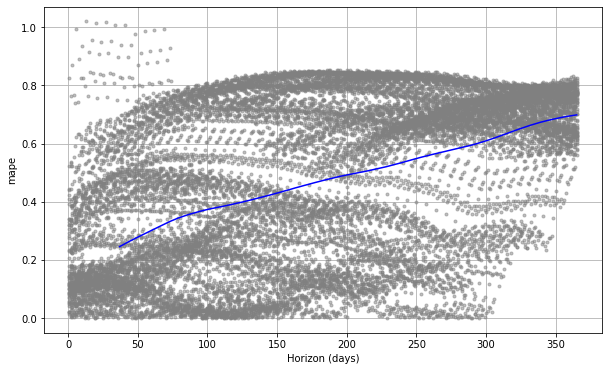

In [62]:
m2 = Prophet(growth="linear", daily_seasonality=True)
m2.fit(df)
forecast2 = m2.predict(future)
df_cv2 = cross_validation(m2, initial = '2093 days', period = '7 days', horizon = '365 days')
df_p2 = performance_metrics(df_cv2)

fig2 = plot_cross_validation_metric(df_cv2, metric='mape')

In [70]:
df_cv[['yhat', 'y']].pct_change()

,yhat,y
0,NaN,NaN
1,-0.000095,0.000334
2,0.001600,0.054719
3,-0.001075,0.051228
4,0.000401,-0.014118
...,...,...
19340,-0.002480,-0.062671
19341,-0.001939,-0.022397
19342,-0.003419,0.014158
19343,-0.002609,-0.019783


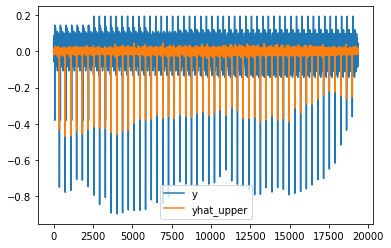

In [79]:
df_cv2[['y', 'yhat_upper']].pct_change().plot()

In [93]:
df_cv[df_cv.duplicated(subset = 'ds')]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
365,2020-01-10,9666.878807,8326.402985,11116.304660,8024.58,2020-01-09
366,2020-01-11,9665.315264,8309.887043,11047.828519,8181.49,2020-01-09
367,2020-01-12,9679.698587,8275.746891,11099.153039,8106.56,2020-01-09
368,2020-01-13,9665.476946,8154.298736,11056.686677,8820.95,2020-01-09
369,2020-01-14,9662.152153,8141.046823,11018.542212,8813.21,2020-01-09
...,...,...,...,...,...,...
19333,2021-12-20,20502.829868,16472.464374,24555.813514,48917.48,2020-12-31
19334,2021-12-21,20539.269710,16639.258325,24583.542085,48614.97,2020-12-31
19335,2021-12-22,20542.724763,16188.026378,24249.981246,50830.20,2020-12-31
19336,2021-12-23,20559.014348,16253.499444,24526.853643,50840.36,2020-12-31


In [94]:
df_cv.query('ds == "2020-01-10"')

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
7,2020-01-10,9980.791095,8422.409384,11452.766494,8024.58,2020-01-02
365,2020-01-10,9666.878807,8326.402985,11116.304660,8024.58,2020-01-09


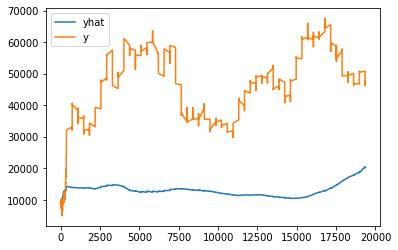

In [100]:
df_cv.drop_duplicates(subset='ds')[['yhat','y']].plot()

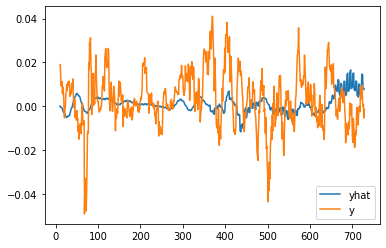

In [120]:
df_cv.drop_duplicates(subset='ds',keep='first').reset_index(drop=True)[['yhat','y']].pct_change().rolling(10).mean().plot()

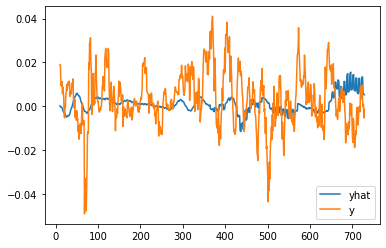

In [121]:
df_cv2.drop_duplicates(subset='ds',keep='first').reset_index(drop=True)[['yhat','y']].pct_change().rolling(10).mean().plot()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 91 forecasts with cutoffs between 2017-04-10 00:00:00 and 2018-12-31 00:00:00


  0%|          | 0/91 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


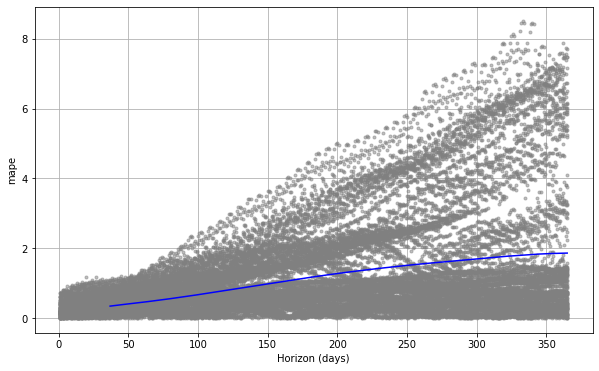

In [11]:
# up to 2019
from fbprophet.plot import plot_cross_validation_metric
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

df2019 = df[df['ds'] <= '2019-12-31']
m3 = Prophet(growth="linear")
m3.fit(df2019)
future = m3.make_future_dataframe(periods=365)
forecast = m3.predict(future)
df_cv3 = cross_validation(m3, period = '7 days', horizon = '365 days')
df_p3 = performance_metrics(df_cv3)
fig = plot_cross_validation_metric(df_cv3, metric='mape')

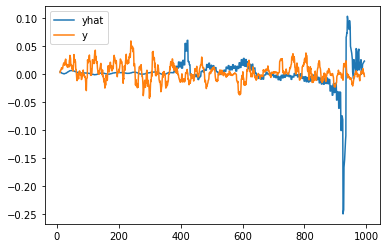

In [13]:
df_cv3.drop_duplicates(subset='ds',keep='first').reset_index(drop=True)[['yhat','y']].pct_change().rolling(10).mean().plot()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 44 forecasts with cutoffs between 2021-01-04 00:00:00 and 2021-11-01 00:00:00


  0%|          | 0/44 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


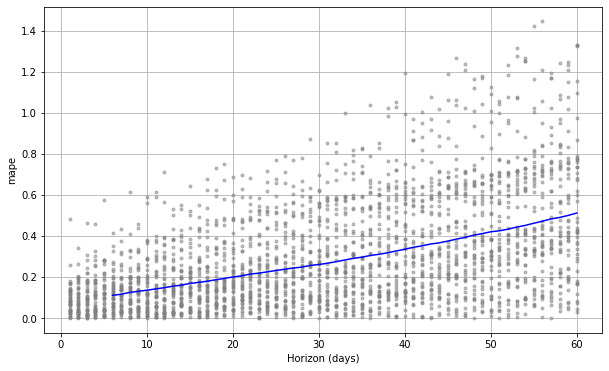

In [25]:
df2020 = df[df['ds'] > '2019-12-31']
m4 = Prophet(growth="linear")
m4.fit(df2020)
future = m4.make_future_dataframe(periods=365)
forecast = m4.predict(future)
df_cv4 = cross_validation(m4, period = '7 days', horizon = '60 days')
df_p4 = performance_metrics(df_cv4)
fig = plot_cross_validation_metric(df_cv4, metric='mape')

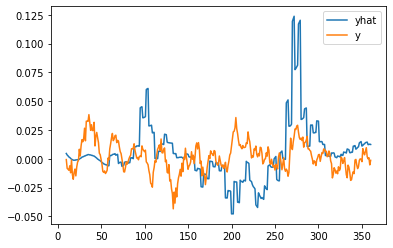

In [26]:
df_cv4.drop_duplicates(subset='ds',keep='first').reset_index(drop=True)[['yhat','y']].pct_change().rolling(10).mean().plot()